In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# simulation parameters
N = 10_000
M = 20

# time vector (radian units)
t = np.linspace(0, 6*np.pi, N)

# Relationship across channels (imposing covariance)
chan_rel = np.sin(np.linspace(0, 2*np.pi, M))

# Generating data
data = np.zeros((M, N))
data[:, :] = np.sin(t)
data = (data.T * chan_rel).T + np.random.randn(M, N)

In [3]:
# mean-centered data (over time)
mc_data = (data.T - np.mean(data, axis=1)).T

In [4]:
# Covariance matrix
cov_mat = (mc_data @ mc_data.T) / (N-1)

# Eigendecomposition sorted
eig_val, eig_vec = np.linalg.eig(cov_mat)
sorted_idxs = eig_val.argsort()[::-1]
eig_val = eig_val[sorted_idxs]
eig_vec = eig_vec[:, sorted_idxs]

# Convert eig values to %
eig_val = 100*eig_val / sum(eig_val)

In [5]:
# PCA via SVD of data matrix
U, S, V = np.linalg.svd(mc_data)

S = S**2

s = (100*S)/np.sum(S)

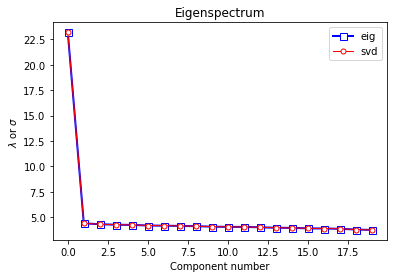

In [6]:
# Ploting eigenvalue and singular-value spectrum

plt.plot(eig_val, 'bs-', markerfacecolor='w', markersize=7, linewidth=2, label='eig')
plt.plot(s, 'ro-', markerfacecolor='w', markersize=5, linewidth=1, label='svd')
plt.xlabel('Component number')
plt.ylabel('$\lambda$ or $\sigma$')
plt.title('Eigenspectrum')
plt.legend()
plt.show()

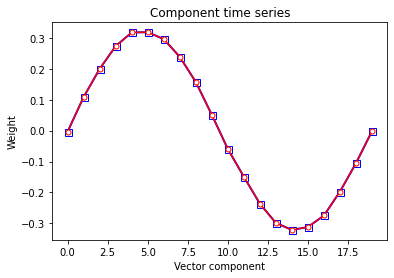

In [7]:
# Show first eigenvector / singular value
# PS: There is sign uncertainty by performing pca. So the signals can be inverted or not

plt.plot(eig_vec[:, 0], 'bs-', markerfacecolor='w', markersize=7, linewidth=2)
plt.plot(U[:, 0], 'ro-', markerfacecolor='w', markersize=5)
plt.xlabel('Vector component')
plt.ylabel('Weight')
plt.title('Component time series')
plt.show()

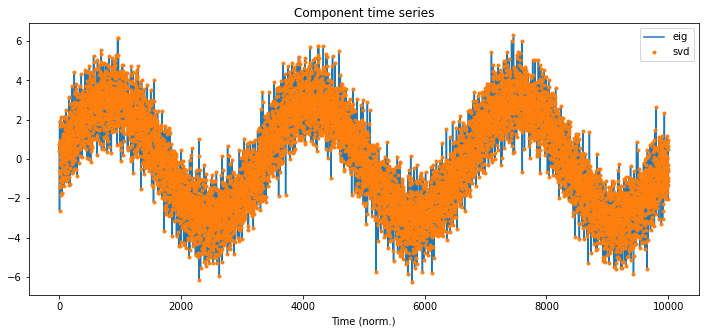

In [8]:
time_vec = np.arange(N)

# time series of top component with eig dec
eig_ts = eig_vec[:, 0] @ data

# time series of top component with svd
svd_ts = U[:, 0] @ data


plt.figure(figsize=(12, 5))
plt.plot(time_vec, eig_ts, label='eig')
plt.plot(time_vec, svd_ts, '.', label='svd')
plt.xlabel('Time (norm.)')
plt.title('Component time series')
plt.legend()
plt.show()